# KMeans
The KMeans algorithm is used to cluster the data based on the distances between the samples and the central points.

The central points are known as centroids

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from utils import train_test_split, min_max_normalize, to_ndarray
from utils.math_functions import euclidian_distance
from cluster import KMeans

np.random.seed(4321)

# Preparing the datasets

## Data Cleaning
The column 'Id' has no predictive value and will be removed from dataset

The 'Species' column is the label of the sample. KMeans is an unsupervised learning algorithm, and don't use label. For this reason, the 'Species' column will be removed from dataset

In [2]:

iris = pd.read_csv('data/iris.csv')

iris.pop('Id')
iris.pop('Species')
;

''

## Split Train Test and Normalization

In [3]:
train, test = train_test_split(iris, train_size=0.7)

In [4]:
train, minmax = min_max_normalize(train)
test, _ = min_max_normalize(test)

# KMeans explanation

* initialize centroids
* calculate labels based on distance between the centroids
* recalculate the centroids

the step 2 and 3 will repet while the labels change, if the labels of previes iterations are equals the of the current iteration the fit process os completed

To initialize the centroids you can select k random samples of the train set, or generate the values randomly. If you decide to generate the values randomly, to optimize, is recomended to generate a value between min and max for each column.

In this example, we will generate the centroids by select random k samples of the train set. We will define k = 3,  this means that we will have 3 clusters

np.random.choice will return k random index between 0 and the size of train set, without replace. Replace = False will garante that the same sample will be not selected, and than we will select the samples using the indexes

In [5]:
x = to_ndarray(train)
k = 3

centroids_idx = np.random.choice(len(x), size=k, replace=False)
centroids = x[centroids_idx]
centroids

array([[0.55555556, 0.04545455, 0.57627119, 0.5       ],
       [0.13888889, 0.36363636, 0.06779661, 0.        ],
       [0.16666667, 0.40909091, 0.08474576, 0.        ]])

In [6]:
def calculate_labels():
    labels = []

    for sample in x:
        distances = euclidian_distance(sample, centroids)
        labels.append(np.argmin(distances))

    return np.array(labels)

labels = calculate_labels()
labels

array([2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 0,
       1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2], dtype=int64)

In [7]:
 def calculate_centroids():
    centroids = []

    for index in range(k):
        mask = labels == index
        selected = x[mask]
        mean = np.mean(selected, axis=0)
        centroids.append(mean)

    return np.array(centroids)

calculate_centroids()

array([[0.5331675 , 0.29443691, 0.65924614, 0.64863184],
       [0.07936508, 0.32467532, 0.05569007, 0.04166667],
       [0.22939068, 0.61143695, 0.08365227, 0.06854839]])

# KMeans Model

In [8]:
model = KMeans(k=3)
model.fit(train)

In [9]:
pred_labels = model.predict(test)

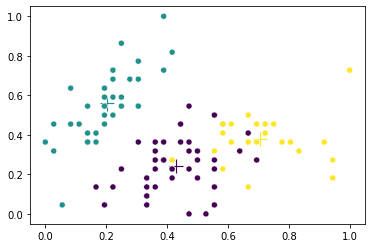

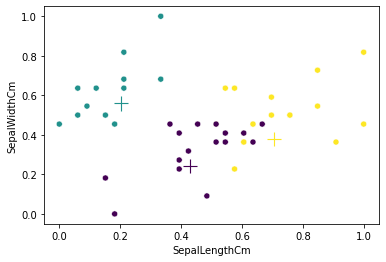

In [10]:
sns.scatterplot(x=model.centroids[:, 0], y=model.centroids[:, 1], marker="+", s=200, c=range(len(model.centroids)))
sns.scatterplot(x=model.x[:, 0], y=model.x[:, 1], c=model.labels)
plt.show()

sns.scatterplot(x=model.centroids[:, 0], y=model.centroids[:, 1], marker="+", s=200, c=range(len(model.centroids)))
sns.scatterplot(x=test['SepalLengthCm'], y=test['SepalWidthCm'], c=pred_labels)
plt.show()